# My_ВКР. Part-2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


### В первой части выполнен разведочный анализ данных, проведено объединение двух фрагментов данных в один файл, выровнено количество строк, нарисованы графики и  гистограммы попарной зависимости переменных.

### По итогу разведочного анализа данных в ходе исследования не обнаружено явных корреляционных зависимостей, а так же показано  отсутствие пропусков в данных.

### Но, судя по диаграммам попарной корреляции, в данных присутствуют выбросы

### Загружаем файл с данными, предварительно обработанными в первой части ВКР

In [2]:
result = pd.read_excel(r"/home/alexander/Документы/BKP/result.xlsx")

### Смотрим типы переменных и их количество.

In [3]:
result = pd.DataFrame(data = result,)
result.dtypes

Unnamed: 0                                int64
Пропорции, %                            float64
Плотность, кг/м3                        float64
модуль упругости, ГПа                   float64
Отвердитель, %                          float64
Эпокс. группы, %                        float64
Температура вспышки, С_2                float64
Поверхностная плотность, г/м2           float64
Модуль упругости при растяжении, ГПа    float64
Прочность при растяжении, МПа           float64
Потребление смолы, г/м2                 float64
Угол нашивки, град                        int64
Шаг нашивки                             float64
Плотность нашивки                       float64
dtype: object

In [4]:
result.head()

,Unnamed: 0,"Пропорции, %","Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [5]:
result.tail()

,Unnamed: 0,"Пропорции, %","Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074
1022,1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,1,6.078902,77.434468


### Удалим столбец 'Unnamed: 0', как не несущий смысловой нагрузки.

In [6]:
result.drop(['Unnamed: 0'], axis=1, inplace=True)

### Проверяем удалениеи сохраняем повторно.

In [7]:
result.head()

,"Пропорции, %","Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [8]:
result.to_excel("/home/alexander/Документы/BKP/result.xlsx")

### Посчитаем выбросы в одном столбце датасета; например, столбец №2 = 'Пропорции, %'

### Вычисления проводим по правилу 3 sigma: 

In [10]:
L_Min_pr = result['Пропорции, %'].mean() - 3 * result['Пропорции, %'].std()
L_Max_pr = result['Пропорции, %'].mean() + 3 * result['Пропорции, %'].std()

outlayers_pr = (result['Пропорции, %'] > L_Max_pr).sum() + (result['Пропорции, %'] < L_Min_pr).sum()

print('Выбросов всего в столбце Пропорции, %         = ', outlayers_pr)             
print('Среднее значение в  в столбце Пропорции, %    = ', result['Пропорции, %'].mean())
print('Стандартное отклонение в столбце Пропорции, % = ', result['Пропорции, %'].std())

Выбросов всего в столбце Пропорции, %         =  0
Среднее значение в  в столбце Пропорции, %    =  2.9303657734325483
Стандартное отклонение в столбце Пропорции, % =  0.9132222362148383


#### В столбце №2 = 'Пропорции, %' выбросы за пределы 3 сигм не обнаружено. 

### Теперь посмотрим на все остальные столбцы по методу 3 сигм

#### Напечатаем количество выбросов в каждом столбце, определённые по методу 3 sigma с использованием цикла, значения LineMin и LineMax задают границы значений переменных, при выходе за которые по правилу 3 sigm будем считать их выбросами. 

In [11]:
out_layers = 0
for cl5 in result.columns:
    LineMin = result[cl5].mean() - 3 * result[cl5].std()
    LineMax = result[cl5].mean() + 3 * result[cl5].std()
    
    outlayers = (result[cl5] > LineMax).sum() + (result[cl5] < LineMin).sum()
    out_layers += outlayers
    print('Столбец =', cl5, '      Выбросов всего = ', outlayers,
         '     Вверх = ', (result[cl5] > LineMax).sum(), 
         '     Вниз =', (result[cl5] < LineMin).sum(), )
print('\n')  
print('Всего выбросов по датасету по методу 3 sigma = ', out_layers)



Столбец = Пропорции, %       Выбросов всего =  0      Вверх =  0      Вниз = 0
Столбец = Плотность, кг/м3       Выбросов всего =  3      Вверх =  1      Вниз = 2
Столбец = модуль упругости, ГПа       Выбросов всего =  2      Вверх =  2      Вниз = 0
Столбец = Отвердитель, %       Выбросов всего =  2      Вверх =  1      Вниз = 1
Столбец = Эпокс. группы, %       Выбросов всего =  2      Вверх =  1      Вниз = 1
Столбец = Температура вспышки, С_2       Выбросов всего =  3      Вверх =  1      Вниз = 2
Столбец = Поверхностная плотность, г/м2       Выбросов всего =  2      Вверх =  2      Вниз = 0
Столбец = Модуль упругости при растяжении, ГПа       Выбросов всего =  0      Вверх =  0      Вниз = 0
Столбец = Прочность при растяжении, МПа       Выбросов всего =  0      Вверх =  0      Вниз = 0
Столбец = Потребление смолы, г/м2       Выбросов всего =  3      Вверх =  2      Вниз = 1
Столбец = Угол нашивки, град       Выбросов всего =  0      Вверх =  0      Вниз = 0
Столбец = Шаг нашивки    

### Как можно видеть, по методу 3 сигм общее количество выбросов = 24

### Напечатаем количество выбросов в каждом столбце по методу межквартильных расстояний с использованием цикла, границы значений переменных задаются LineMin_q и LineMax_q, при выходе за которые по правилу межквартильных расстояний будем считать их выбросами.

In [12]:
out_layers_q = 0


for cl6 in result.columns:
	
	quantile_025 = np.quantile(result[cl6], 0.25)
	quantile_075 = np.quantile(result[cl6], 0.75)
	
	inter_q = quantile_075 - quantile_025
	# inter_q = np.quantile(result[cl6], 0.75) - np.quantile(result[cl6], 0.25)
	
	LineMin_q = np.quantile(result[cl6], 0.25) - 1.5 * inter_q
	LineMax_q = np.quantile(result[cl6], 0.75) + 1.5 * inter_q

	outlayers_q = (result[cl6] > LineMax_q).sum() + (result[cl6] < LineMin_q).sum()
			
	out_layers_q += outlayers_q
    
	print('Столбец =', cl6, '     Выбросов всего = ', outlayers_q,
         '     Вверх = ', (result[cl6] > LineMax_q).sum(), 
         '     Вниз =', (result[cl6] < LineMin_q).sum(), )
print('\n')
print('Всего выбросов по датасету по методу межквартильных расстояний = ', out_layers_q)

Столбец = Пропорции, %      Выбросов всего =  6      Вверх =  4      Вниз = 2
Столбец = Плотность, кг/м3      Выбросов всего =  9      Вверх =  7      Вниз = 2
Столбец = модуль упругости, ГПа      Выбросов всего =  2      Вверх =  2      Вниз = 0
Столбец = Отвердитель, %      Выбросов всего =  14      Вверх =  7      Вниз = 7
Столбец = Эпокс. группы, %      Выбросов всего =  2      Вверх =  1      Вниз = 1
Столбец = Температура вспышки, С_2      Выбросов всего =  8      Вверх =  4      Вниз = 4
Столбец = Поверхностная плотность, г/м2      Выбросов всего =  2      Вверх =  2      Вниз = 0
Столбец = Модуль упругости при растяжении, ГПа      Выбросов всего =  6      Вверх =  4      Вниз = 2
Столбец = Прочность при растяжении, МПа      Выбросов всего =  11      Вверх =  6      Вниз = 5
Столбец = Потребление смолы, г/м2      Выбросов всего =  8      Вверх =  5      Вниз = 3
Столбец = Угол нашивки, град      Выбросов всего =  0      Вверх =  0      Вниз = 0
Столбец = Шаг нашивки      Выбросо

### Сравним количество выбросов по методам 3 сигма и межквартильных расстояний 

In [13]:
print('Всего выбросов по датасету по методу 3 sigma                   = ', out_layers)
print('Всего выбросов по датасету по методу межквартильных расстояний = ', out_layers_q)


Всего выбросов по датасету по методу 3 sigma                   =  24
Всего выбросов по датасету по методу межквартильных расстояний =  93


### Удалим то, что определено как "выброс" по методу межквартильных расстояний

In [14]:
quantile_025 = result.quantile(q = 0.25)
quantile_075 = result.quantile(q = 0.75)
	
inter_q = quantile_075 - quantile_025
	
LineMin_quantile = quantile_025 - 1.5 * inter_q
LineMax_quantile = quantile_075 + 1.5 * inter_q
	
result_clean = result[~((result > LineMax_quantile) | (result < LineMin_quantile)).any(axis=1)]

### Проверим общее количество строк в массиве после удаления выбросов 

In [15]:
print('Строк в массиве до удаления выбросов    =', len(result.index))
print('Строк в массиве после удаления выбросов =', len(result_clean.index))


Строк в массиве до удаления выбросов    = 1023
Строк в массиве после удаления выбросов = 936


### Видим, что осталось 936 строк из 1023 

### Для справки сравним вычисленные значения нижней границы выбросов для Плотность нашивки, определённые:
### 1. по методу 3sigma в цикле (как последнее значение в памяти, оставшееся при выходе из цикла)
### 2. по методу межквартильного расстояния в цикле (как последнее значение в памяти, оставшееся при выходе из цикла)
### 3. по методу межквартильного расстояния командой result.quantile(q = 0.25)

In [19]:
print('по методу 3sigma в цикле                     =', LineMin)
print('по методу межквартильного расстояния в цикле =', LineMin_q)
print('командой result.quantile(q = 0.25)           =', LineMin_quantile['Плотность нашивки'])

по методу 3sigma в цикле                     = 20.101023036903705
по методу межквартильного расстояния в цикле = 27.08058869124911
командой result.quantile(q = 0.25)           = 27.08058869124911


### Посмотрим, что получилось и отрисуем BoxPlot после удаления выбросов

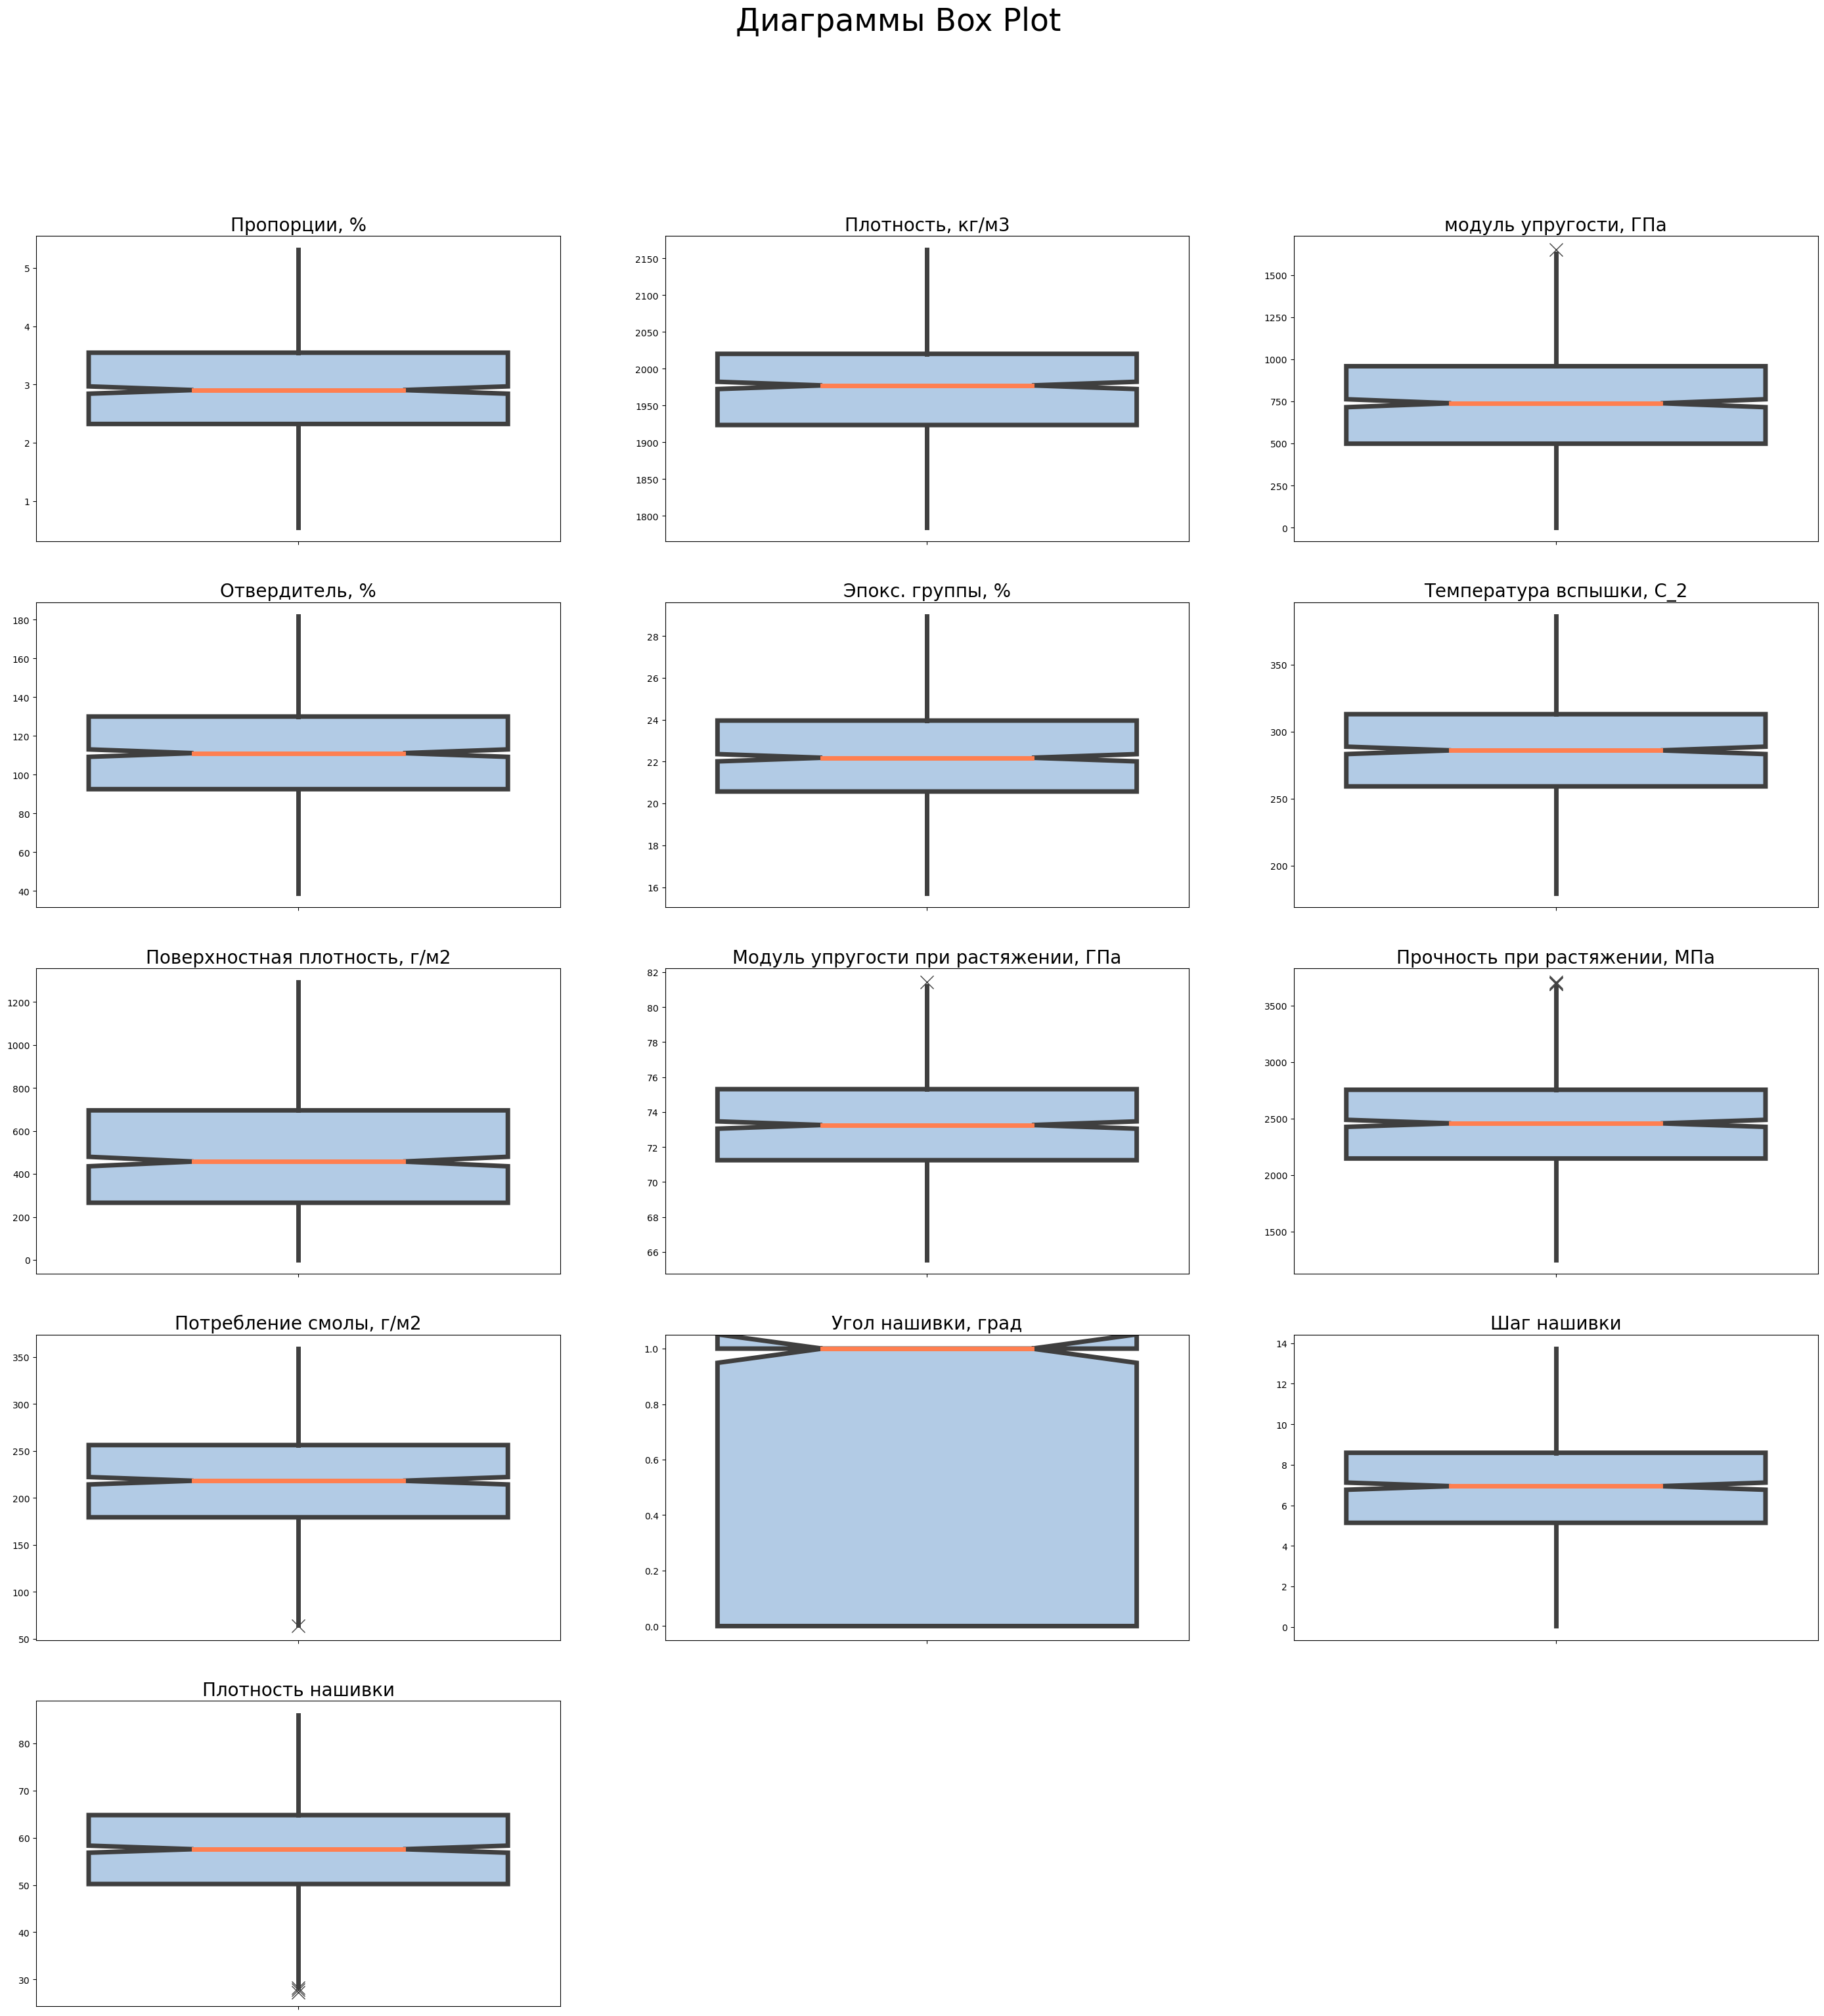

In [16]:
x2 = 5 # строки
y2 = 3 # столбцы
count2 = 1 # счётчик рисунков

plt.figure(figsize = (35,35))
plt.suptitle('Диаграммы Box Plot', fontsize = 34)
for cl7 in result_clean.columns:
  plt.subplot(x2, y2, count2)
  sns.boxplot(data = result_clean, y = result_clean[cl7], fliersize = 15, linewidth = 5, 
              boxprops={"facecolor": (.4, .6, .8, .5)}, 
              notch=True, showcaps=False, flierprops={"marker": "x"}, 
              medianprops={"color": "coral"}, )
  plt.ylabel(None)
  plt.title(cl7, size = 20)
  count2 += 1


### Практически без выбросов по сравнению с исходником. Отдельные выбросы присутствуют в столбцах "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", но дальнейшее удаление строк ещё сократит наш небольшой датасет и, кроме того, нет уверенности, что при продолжении очистки данных методом удаления строк мы не потеряем какие-то закономерности.  

### Нарисуем гистограммы ещё раз; их 13 и, как и в разведочном анализе, рисуем по три гистограммы в строке по горизонтали и в пять строк по вертикали. Дополнительно рисуем огибающую, установив в sns.hisplot параметр kde=True

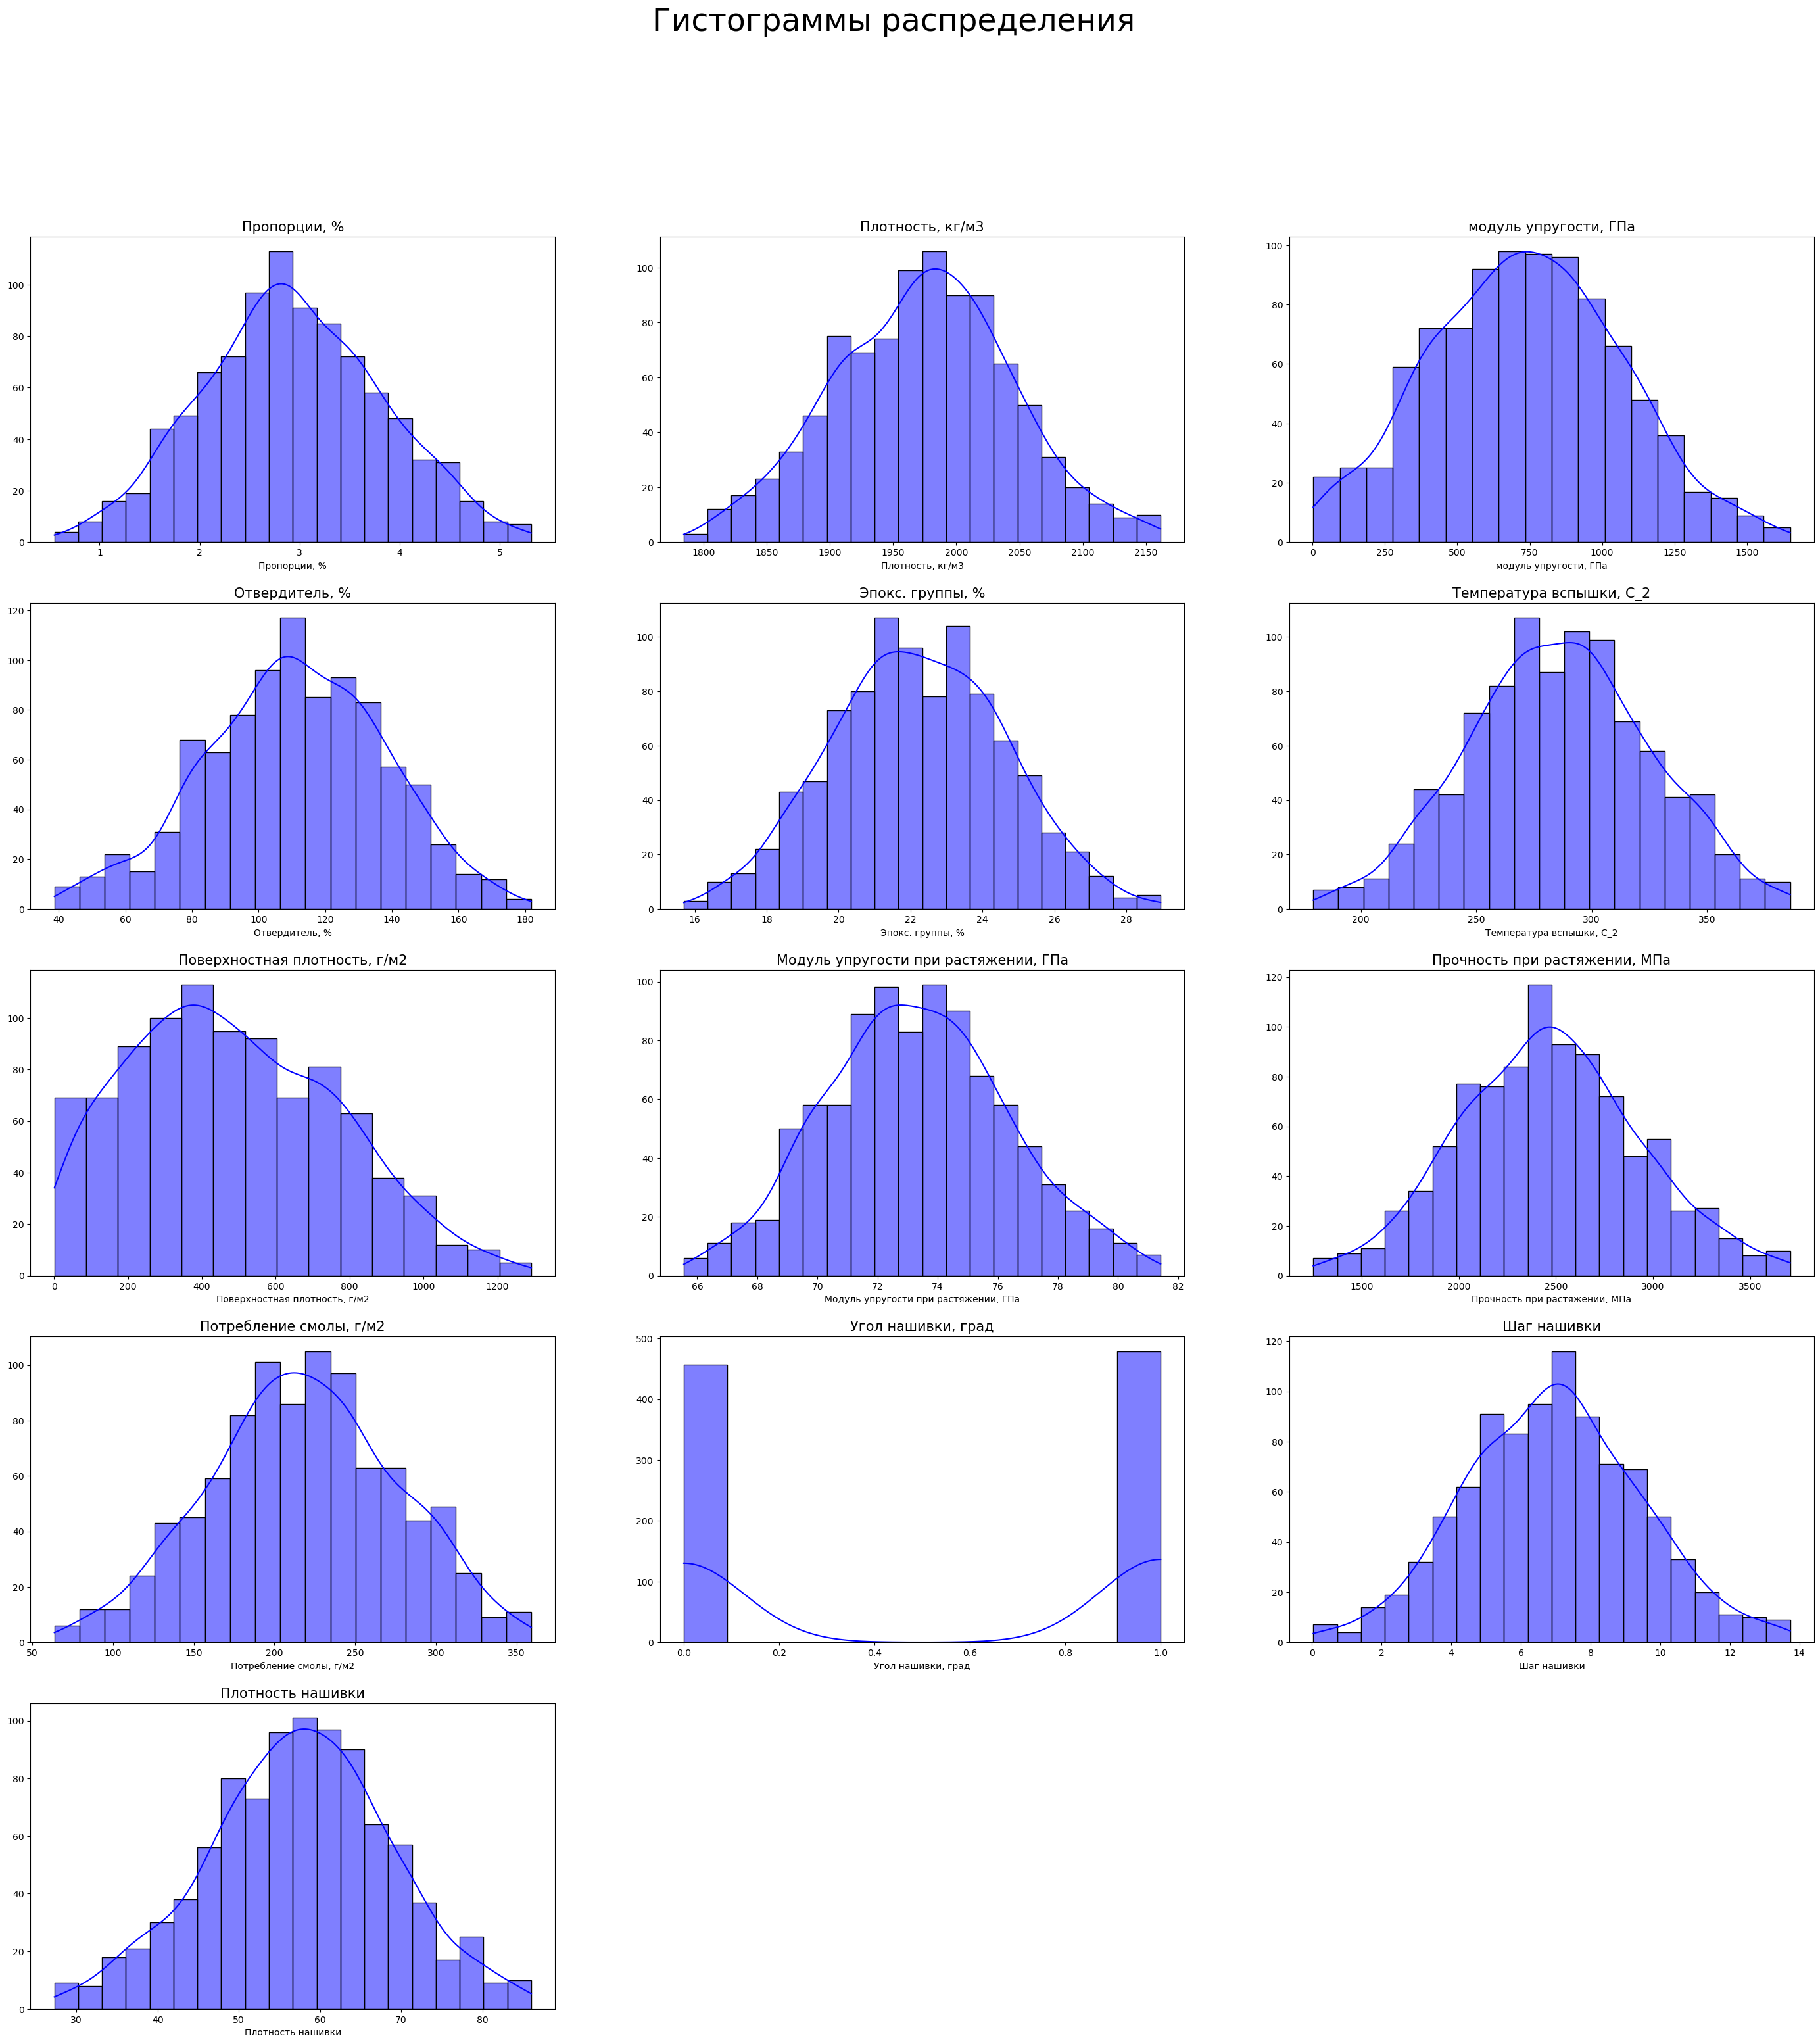

In [17]:
x = 5 # строки
y = 3 # столбцы
count1 = 1 # счётчик рисунков
plt.figure(figsize = (35,35))
plt.suptitle(' Гистограммы распределения ', fontsize = 34)
for cl9 in result_clean.columns:
  plt.subplot(x, y, count1)
  sns.histplot(data = result_clean[cl9], kde=True, color = "blue")
  plt.ylabel(None)
  plt.title(cl9, size = 15)
  count1 += 1

### Нарисуем отдельно распределения в столбцах "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2"

Text(0, 0.5, 'Плотность нашивки')

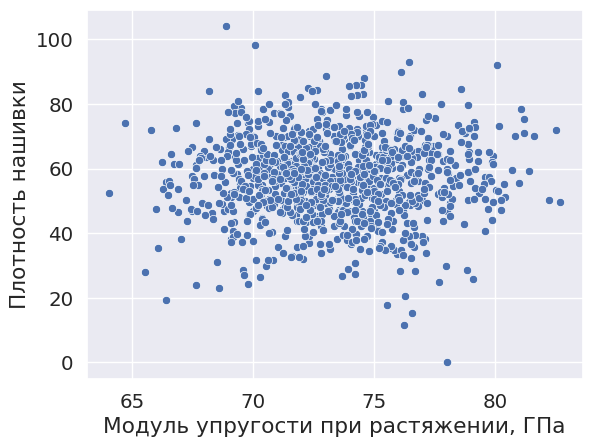

In [18]:
sns.set(font_scale=1.3)
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.scatterplot(x='Модуль упругости при растяжении, ГПа',  y='Плотность нашивки', data=result)
plt.xlabel('Модуль упругости при растяжении, ГПа')
plt.ylabel('Плотность нашивки')

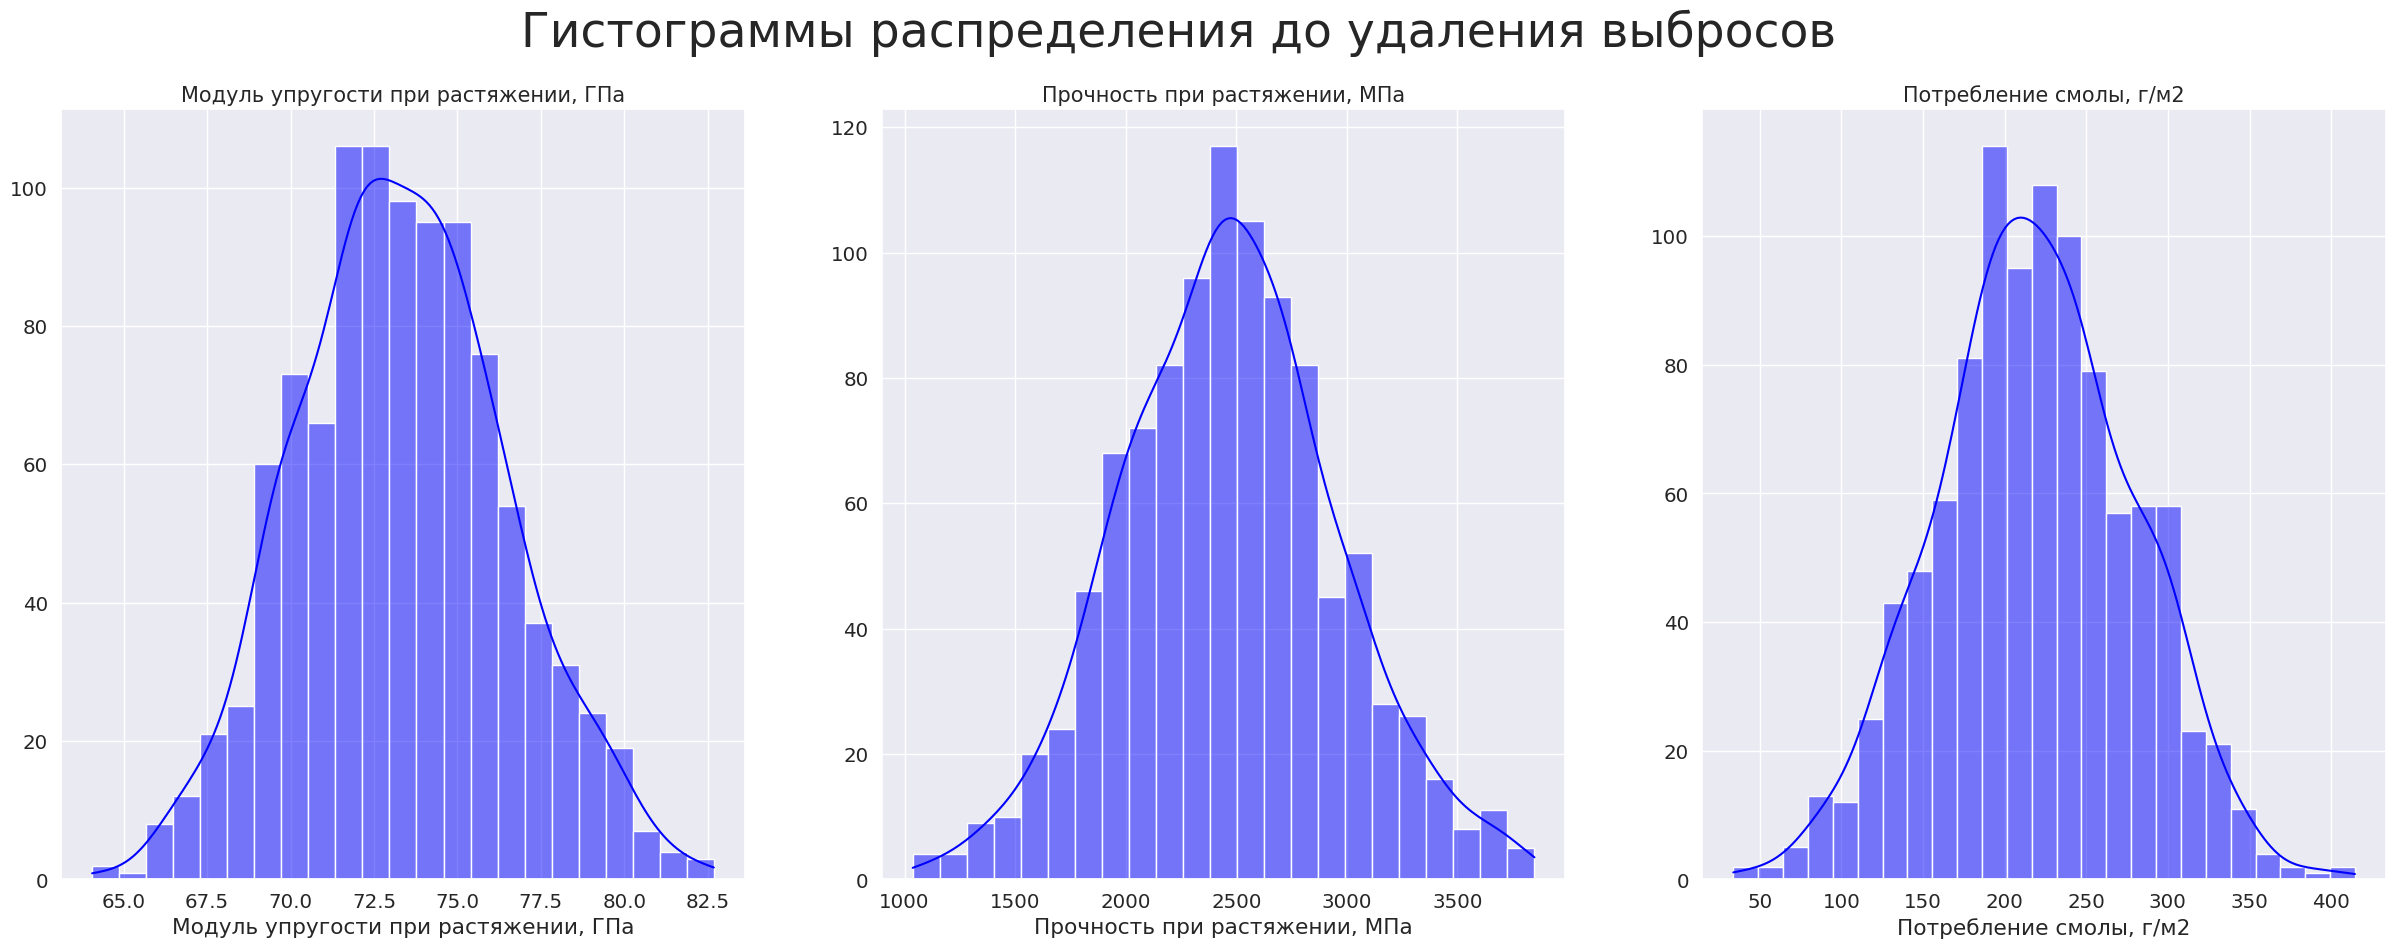

In [19]:
x = 1 # строки
y = 3 # столбцы
count = 1 # счётчик рисунков
problem_columns = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2']
plt.figure(figsize = (30,10))
plt.suptitle('Гистограммы распределения до удаления выбросов ', fontsize = 34)
for cl in problem_columns:
  plt.subplot(x, y, count)
  sns.histplot(data = result[cl], kde=True, color = "blue")
  plt.ylabel(None)
  plt.title(cl, size = 15)
  count += 1

<AxesSubplot: xlabel='Модуль упругости при растяжении, ГПа', ylabel='Count'>

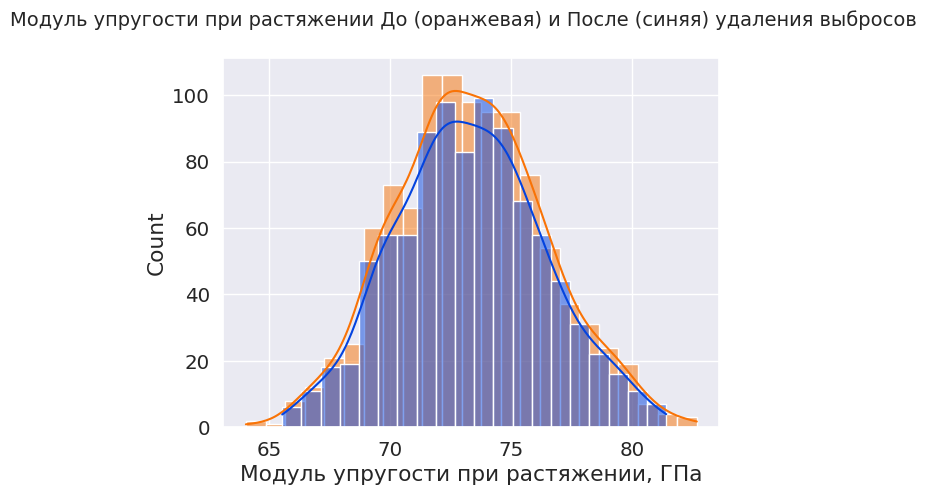

In [22]:
plt.suptitle('Модуль упругости при растяжении До (оранжевая) и После (синяя) удаления выбросов', fontsize = 14)
sns.histplot(data = result["Модуль упругости при растяжении, ГПа"], kde=True, color = "#f97306")
sns.histplot(data = result_clean["Модуль упругости при растяжении, ГПа"], kde=True, color = "#0343df")

### Видно, что удалены малые значения на краях кривой распределения и усилился "провал" в районе медианного значения.  

<AxesSubplot: xlabel='Прочность при растяжении, МПа', ylabel='Count'>

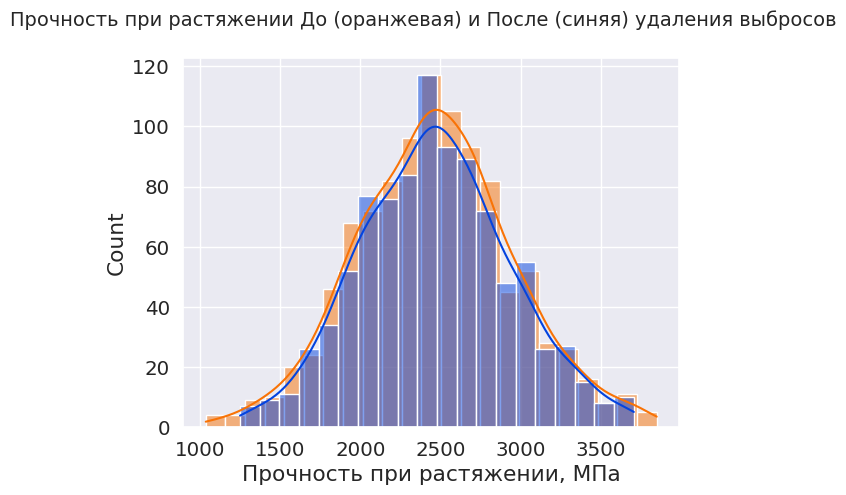

In [23]:

plt.suptitle('Прочность при растяжении До (оранжевая) и После (синяя) удаления выбросов', fontsize = 14)
sns.histplot(data = result["Прочность при растяжении, МПа"], kde=True, color = "#f97306")
sns.histplot(data = result_clean["Прочность при растяжении, МПа"], kde=True, color = "#0343df")

### Видно, что удалены малые значения на краях кривой распределения, в остальном кривые распределения похожи.  

<AxesSubplot: xlabel='Потребление смолы, г/м2', ylabel='Count'>

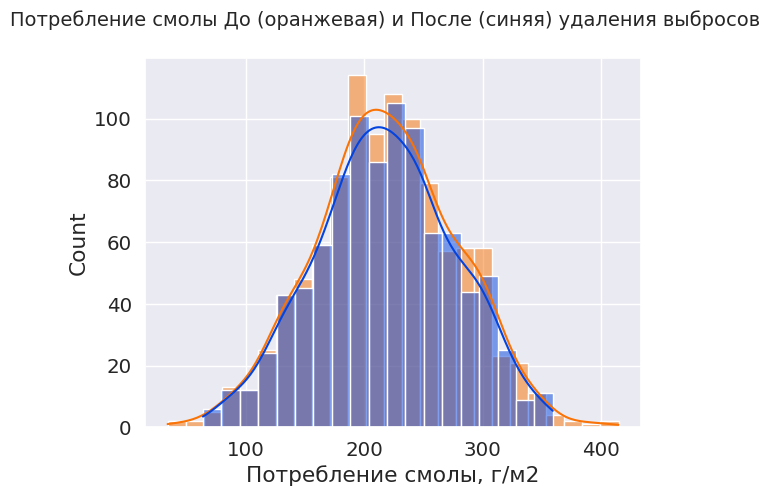

In [24]:
plt.suptitle('Потребление смолы До (оранжевая) и После (синяя) удаления выбросов', fontsize = 14)
sns.histplot(data = result["Потребление смолы, г/м2"], kde=True, color = "#f97306")
sns.histplot(data = result_clean["Потребление смолы, г/м2"], kde=True, color = "#0343df")

### Видно, что удалены малые значения на краях кривой распределения, кривая нормального распределения стала более гладкой, но усилился "провал" в районе медианного значения.  

### Сохраняем данные в csv и excel форматы: 
### result_clean.to_csv('/home/alexander/Документы/BKP/result_clean.csv', encoding = 'cp1251' )
### result_clean.to_excel("/home/alexander/Документы/BKP/result_clean.xlsx")


In [25]:
result_clean.to_csv('/home/alexander/Документы/BKP/result_clean.csv', encoding = 'cp1251' )

In [26]:
result_clean.to_excel("/home/alexander/Документы/BKP/result_clean.xlsx")

In [27]:
result_clean.columns.tolist()

['Пропорции, %',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Отвердитель, %',
 'Эпокс. группы, %',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки']

### Диапазоны значений величин разные, а для загрузки датасета в нейронную сеть их необходимо нормализовать.